In [1]:
import pandas as pd
import numpy as np
import requests
import datetime
import json
from matplotlib import pyplot
from datetime import date

# Yahoo Finance - Import yfinance package
import yfinance as yf

#functions
import finn_finance as f
from finn_finance import crypto_account

transactions = [['BTC/USD',46726.59,'2022-04-04',97.01,'CREDIT'],['BTC/USD',37837.50,'2022-04-30',197.01,'CREDIT'],['BTC/USD',30810.31,'2022-05-09',295.60,'CREDIT'],['ETH/USD',3525.92,'2022-04-04',97.01,'CREDIT'],['ETH/USD',2880.60,'2022-05-01',295.6,'CREDIT'],['ETH/USD',2297.32,'2022-05-09',295.60,'CREDIT']]

today = date.today()
day_1 = datetime.timedelta(1)
yesterday = today - day_1
get_yesterday = yesterday.strftime("%Y-%m-%d")


In [2]:
# Set Lookback
lookback_window = 90

today = datetime.date.today()
days = datetime.timedelta(lookback_window)
lookback = today - days

start_date = lookback
end_date = today
print('Start Date: '+str(start_date))
print('End Date: '+str(end_date))

Start Date: 2022-02-21
End Date: 2022-05-22


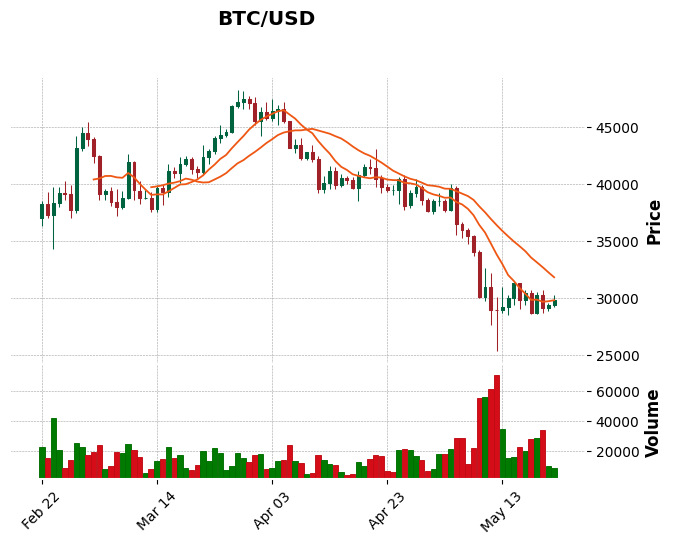

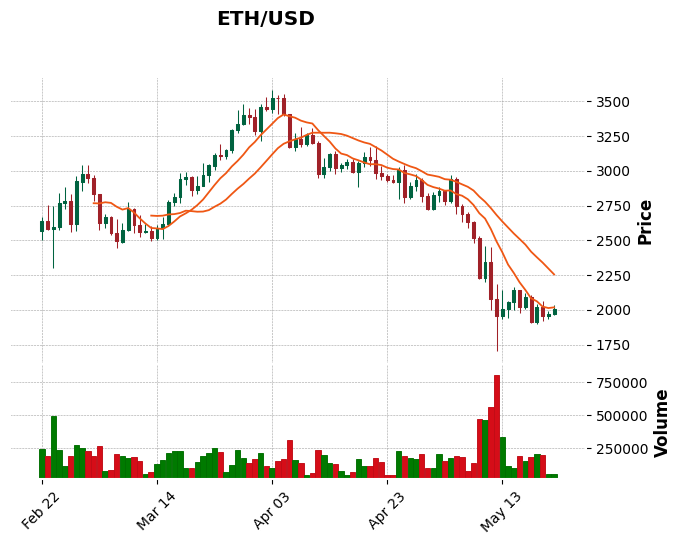

In [3]:
# Crypto data analysis
ticker_crypto = ['BTC/USD','ETH/USD']

for i in ticker_crypto:
    # Get the data
    data = f.fetch_daily_data(i)
    date_candle = pd.read_csv(data,index_col=['date'],parse_dates=True,chunksize=1000)
    date_candle = pd.concat((x.query("date > %a"%(start_date)) for x in date_candle))
    date_candle = date_candle.sort_values(by='date')

    f.candle_stick(date_candle,i)

Bitcoin Value on 2022-05-21 00:00:00: $496.3246805917526


Text(0.5, 1.0, 'BTC/USD')

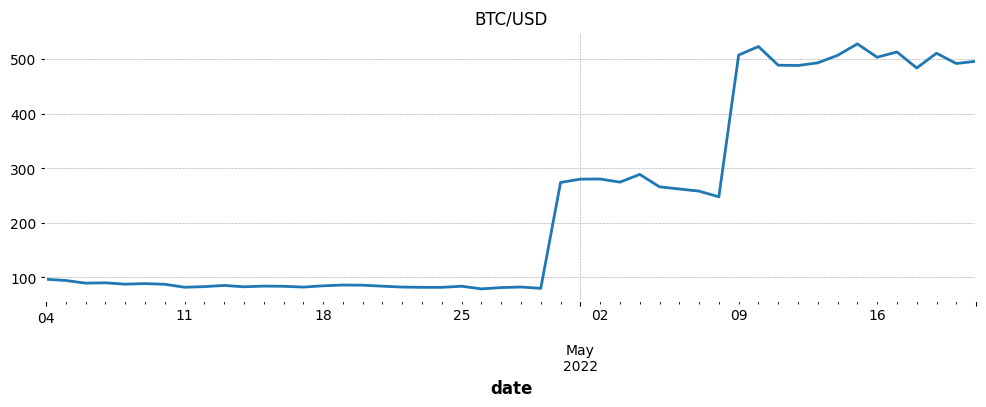

In [4]:
df_btc = crypto_account(transactions,'BTC/USD').crypto_dollar_value()

print('Bitcoin Value on '+str(df_btc.index.array[len(df_btc)-1])+': $'+str(df_btc.iloc[len(df_btc)-1]['account_value']['close']))
pyplot.rcParams["figure.figsize"] = [12, 3.50]
df_btc.plot.line(legend=None)
pyplot.title('BTC/USD')

Ethereum Value on 2022-05-21 00:00:00: $510.5242946141884


Text(0.5, 1.0, 'ETH/USD')

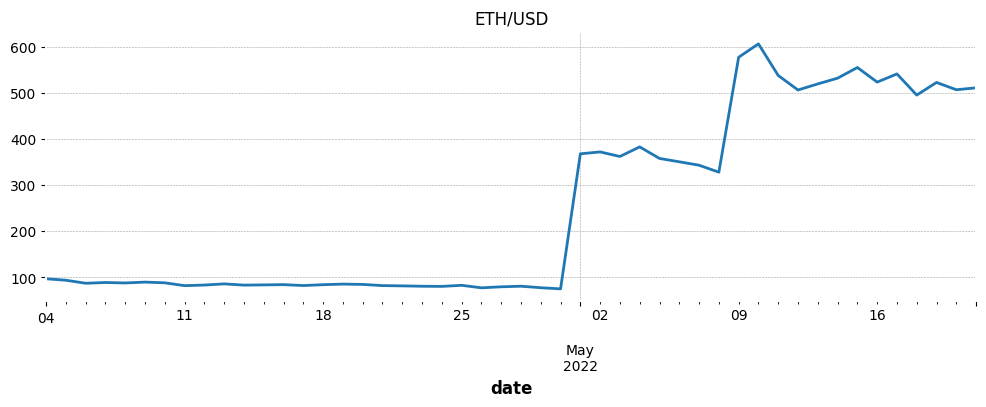

In [5]:
df_eth = crypto_account(transactions,'ETH/USD').crypto_dollar_value()

print('Ethereum Value on '+str(df_eth.index.array[len(df_eth)-1])+': $'+str(df_eth.iloc[len(df_eth)-1]['account_value']['close']))
pyplot.rcParams["figure.figsize"] = [12, 3.50]
df_eth.plot.line(legend=None)
pyplot.title('ETH/USD')

[*********************100%***********************]  1 of 1 completed
BHP


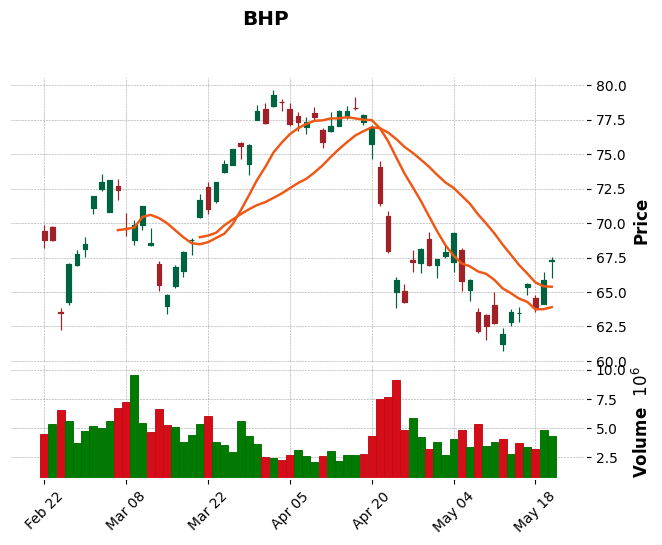

[*********************100%***********************]  1 of 1 completed
VALE


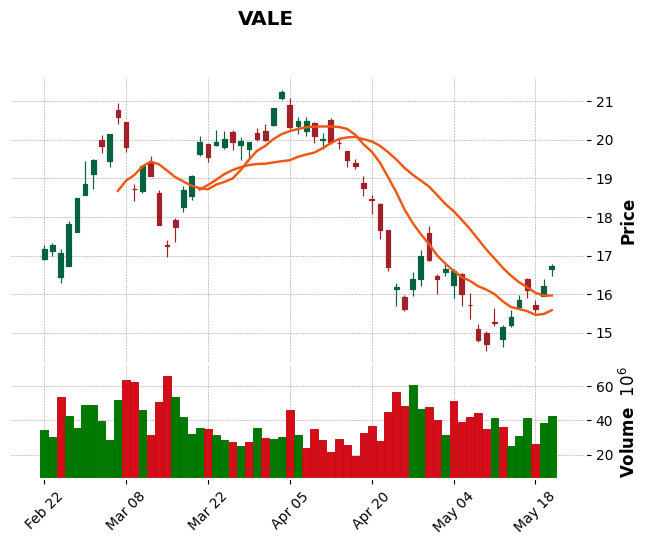

In [6]:
# Stock market data analysis commodities

# Set the ticker
ticker_stock = ['BHP','VALE']

for i in ticker_stock:
    # Get the data
    data = yf.download(i, start_date, end_date, auto_adjust=True)
    print(i)
    f.candle_stick(data,i)

[*********************100%***********************]  1 of 1 completed
AAPL


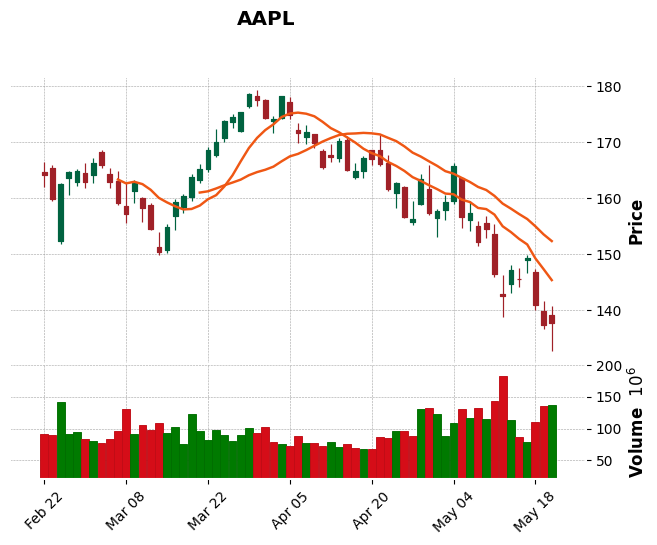

In [7]:
# Stock market data analysis tech

# Set the ticker
ticker_stock = ['AAPL']

for i in ticker_stock:
    # Get the data
    data = yf.download(i, start_date, end_date, auto_adjust=True)
    print(i)
    f.candle_stick(data,i)

[*********************100%***********************]  1 of 1 completed
UNG


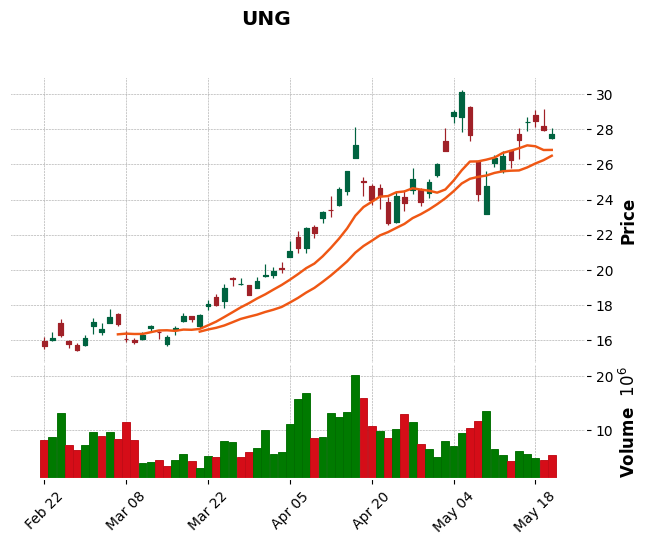

In [8]:
# Stock market data analysis energy

# Set the ticker
ticker_stock = ['UNG']

for i in ticker_stock:
    # Get the data
    data = yf.download(i, start_date, end_date, auto_adjust=True)
    print(i)
    f.candle_stick(data,i)